**Week 1**

# Basics

In [75]:
import networkx as nx
import matplotlib as plt
import numpy as np
import pandas as pd
%matplotlib notebook

## undirected Graph

In [3]:
G = nx.Graph() # graph class
G.add_edge('A',"B") #creating non existing edge automatically created node
G.add_edge("B","C")


## directed network

In [4]:
G = nx.DiGraph()
G.add_edge('B','A')
G.add_edge("B",'C') #direction is important!

## weighted Network

In [5]:
G = nx.Graph()
G.add_edge("A",'B', weight=6)
G.add_edge('B',"C", weight=13)

## Signed Network
carry information about friendship and antagonism based on conflict

In [6]:
G = nx.Graph()
G.add_edge('A','B', sign='+')
G.add_edge('B',"C", sign='-')

## Multigraph

nodes can have different types of relations simultaneously

In [7]:
G = nx.MultiGraph()
G.add_edge('A',"B", relation='coworker')
G.add_edge('A',"B", relation='friend')

## other edge attributes


In [8]:
G = nx.Graph() 
G.add_edge('A','B', relation='friend')
G.add_edge('B',"C", relation='coworker')
G.add_edge('D',"E", relation='family')
G.add_edge('E',"I", relation='neighbor')

# or

G.add_edge('A','B', weight=6, relation='family')

## Query attributes/edges

In [9]:
G.edges()  # list of all edges


[('A', 'B'), ('B', 'C'), ('D', 'E'), ('E', 'I')]

In [10]:
G.edges(data=True) # list of all edges + attributes

[('A', 'B', {'relation': 'family', 'weight': 6}),
 ('B', 'C', {'relation': 'coworker'}),
 ('D', 'E', {'relation': 'family'}),
 ('E', 'I', {'relation': 'neighbor'})]

In [11]:
G.edges(data='relation') #list of all aedges with attribute 'relation

[('A', 'B', 'family'),
 ('B', 'C', 'coworker'),
 ('D', 'E', 'family'),
 ('E', 'I', 'neighbor')]

In [12]:
# attributes of a specific edge
G.edge['A']['B']  # dict of attributes of edge(A,B)

{'relation': 'family', 'weight': 6}

In [13]:
G.edge['A']

{'B': {'relation': 'family', 'weight': 6}}

In [14]:
G.add_edge('A','I', relation='Friend', weight=7)

In [15]:
G.edge['A']

{'B': {'relation': 'family', 'weight': 6},
 'I': {'relation': 'Friend', 'weight': 7}}

In [16]:
G.edge['B']['C']['relation']

'coworker'

In [17]:
# order doesnt matter since it is undirected,
# in directed graphs it does!
G.edge['C']['B']['relation']

'coworker'

In [18]:
# UNdirected multigraph
G =nx.MultiGraph()
G.add_edge('A','B', weight=6, relation='family')
G.add_edge('A','B', weight=18, relation='friend')
G.add_edge('C','B', weight=12, relation='friend')

G.edge['A']['B']

{0: {'relation': 'family', 'weight': 6},
 1: {'relation': 'friend', 'weight': 18}}

In [19]:
G.edge['A']['B'][0]['weight'] #I want the first edge, order doesnt matter, 

6

In [20]:
# DIrected Multigraph
G = nx.MultiDiGraph()
G.add_edge('A','B', weight=6, relation='family')
G.add_edge('A','B', weight=18, relation='friend')
G.add_edge('C','B', weight=12, relation='friend')

G.edge['A']['B'][0]['weight']
#G.edge['B']['A'][0]['weight'] gives error because edge B->A doesnt exist

6

In [21]:
# attributes can also be stored in the node
# ex: work title 

G=nx.Graph()
G.add_edge('A','B', weight=6, relation='family')
G.add_edge('A','B', weight=18, relation='friend')
G.add_edge('C','B', weight=12, relation='friend')

G.add_node('A', role='trader') # node already exost but new attrib can always be assigned
G.add_node('B', role='trader')
G.add_node('C', role='manager')

In [22]:
G.nodes()

['A', 'B', 'C']

In [23]:
G.nodes(data=True)

[('A', {'role': 'trader'}),
 ('B', {'role': 'trader'}),
 ('C', {'role': 'manager'})]

In [24]:
G.node['A']['role']

'trader'

## Bipartite Graph

a graph whose nodes can be split into two sets L and R and every edge connects an node in L with a node in R.

Ex: fans of sport teams (L) and sport teams(R), linking fans to their team 

In [41]:
B=nx.Graph()
# populate graph with list of nodes and set atti bipart to 0
# --> " this is the first set of nodes in my bipartite graph"
B.add_nodes_from(["A","B","C","D","E"], bipartite=0)
B.add_nodes_from([1,2,3,4], bipartite=1)
B.add_edges_from([('A',1),('B',1),('C',1),('C',3),('D',2),('E',3),('E',4)])

In [36]:
# check if graph is bipartite

nx.bipartite.is_bipartite(B)

True

In [37]:
# add edge A B
B.add_edge("A","B")
nx.bipartite.is_bipartite(B)

False

In [38]:
# remove edge
B.remove_edge("A","B")

In [39]:
# check if set of nodes is bipartition of graph

X=set([1,2,3,4])/
nx.bipartite.is_bipartite_node_set(B,X)

True

In [40]:
X

{1, 2, 3, 4}

### projected Graph
L-Bipartite graph projection: networks of nodes in group L where a pair of nodes is connected if they have a common neighbour in R in the bipartite graph

In [48]:
B = nx.Graph()
B.add_edges_from([('A',1),('B',1),('C',1),('D',1),('H',1),('B',2),('C',2),
                 ('D',2),('E',2),("G",2),('F',3),('H',3),('J',3),('E',4),('I',4),('J',4)])
X=set(["A","B","C","D","E","F","G","H","I","J"])
P = nx.bipartite.projected_graph(B,X)  # fans that are connected by at least on sports team

<IPython.core.display.Javascript object>


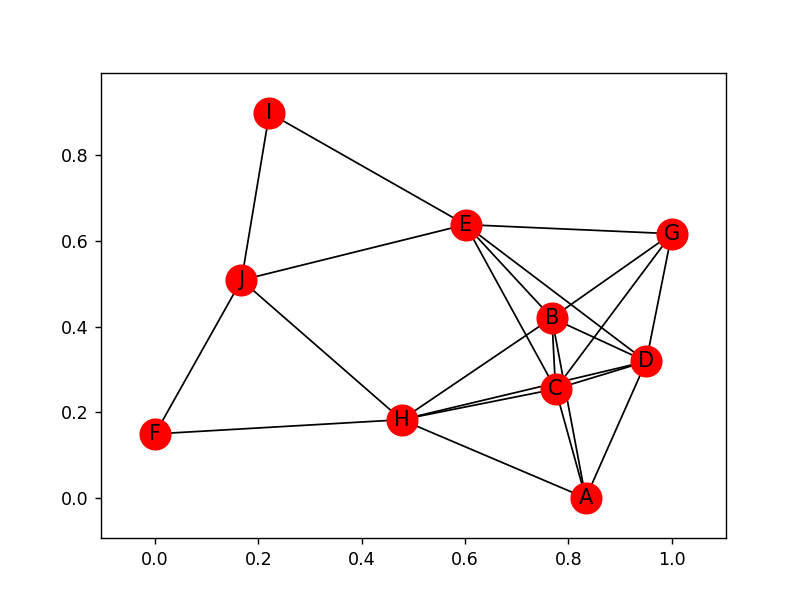

In [51]:
nx.draw_networkx(P)

<IPython.core.display.Javascript object>


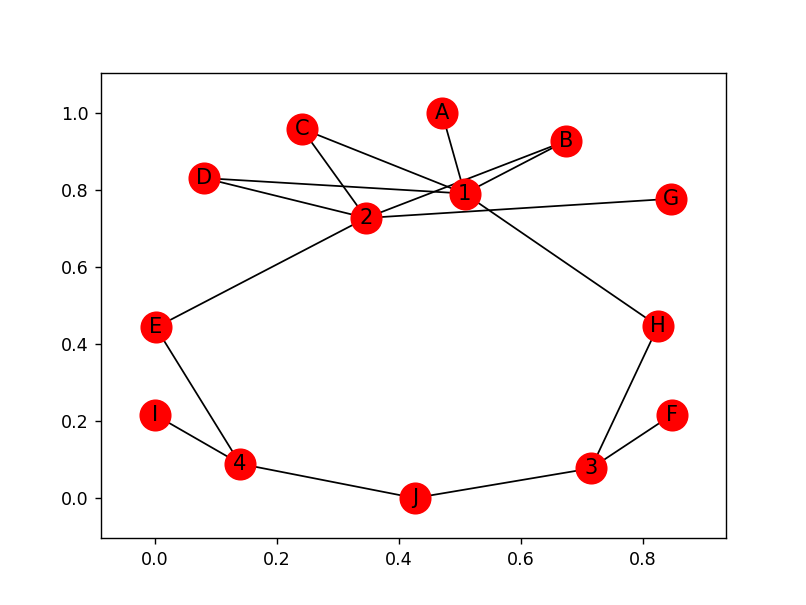

In [52]:
nx.draw_networkx(B)

<IPython.core.display.Javascript object>


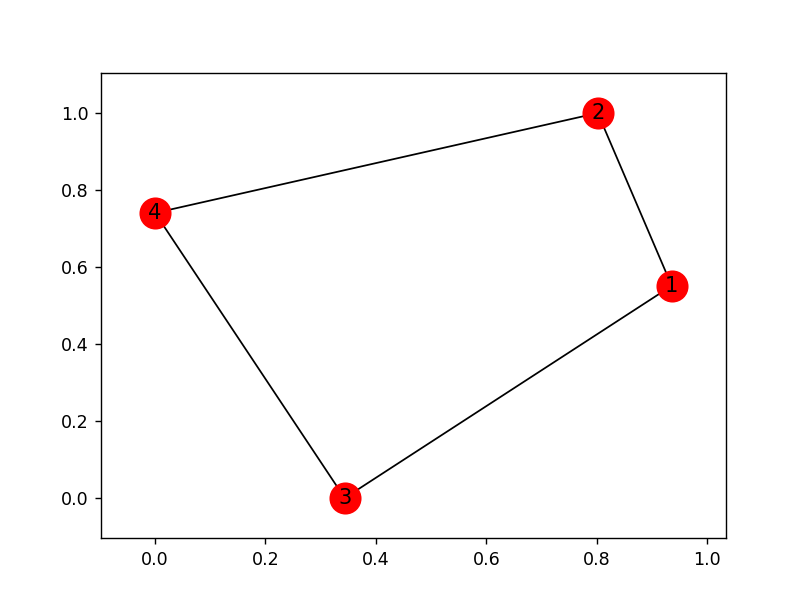

In [55]:
## L-bipartite weighted proj graph

X=set([1,2,3,4])
P=nx.bipartite.weighted_projected_graph(B,X)
nx.draw_networkx(P)

<IPython.core.display.Javascript object>


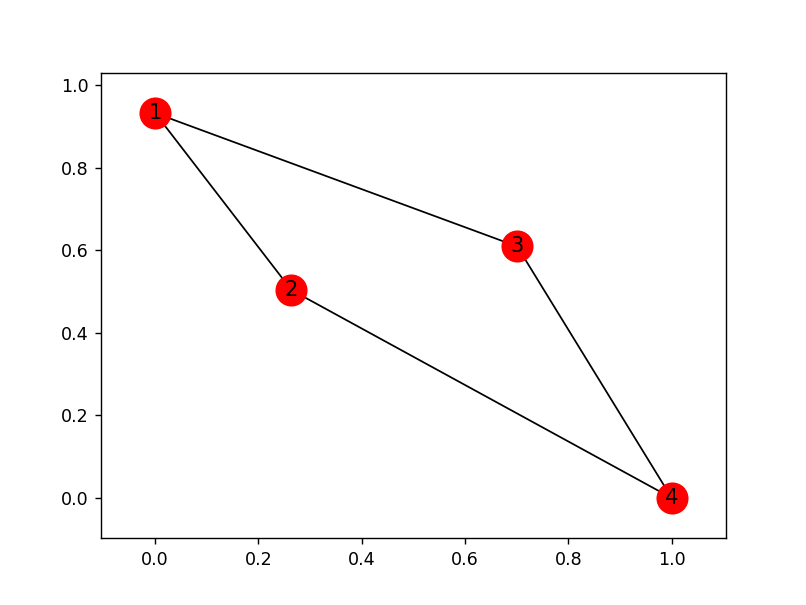

In [56]:
from networkx.algorithms import bipartite
X=set([1,2,3,4])
P=bipartite.weighted_projected_graph(B,X)
nx.draw_networkx(P)

# Loading Graphs in NetworkX

<IPython.core.display.Javascript object>


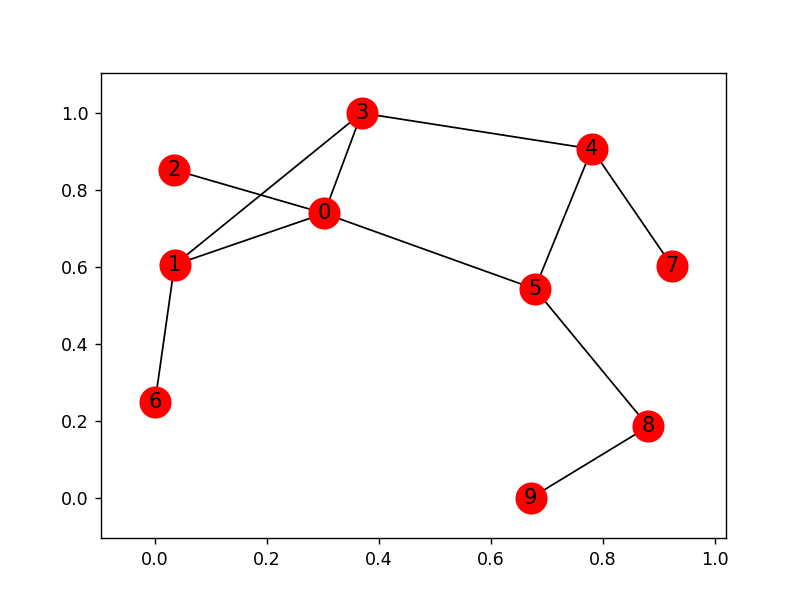

In [58]:
# Instantiate the graph
G1 = nx.Graph()
# add node/edge pairs
G1.add_edges_from([(0, 1),
                   (0, 2),
                   (0, 3),
                   (0, 5),
                   (1, 3),
                   (1, 6),
                   (3, 4),
                   (4, 5),
                   (4, 7),
                   (5, 8),
                   (8, 9)])

# draw the network G1
nx.draw_networkx(G1)

## Adjacency List

`G_adjlist.txt` is the adjaceny list representation of G1.

It can be read as follows:
* `0 1 2 3 5` $\rightarrow$ node `0` is adjacent to nodes `1, 2, 3, 5`
* `1 3 6` $\rightarrow$ node `1` is (also) adjacent to nodes `3, 6`
* `2` $\rightarrow$ node `2` is (also) adjacent to no new nodes
* `3 4` $\rightarrow$ node `3` is (also) adjacent to node `4` 

and so on. Note that adjacencies are only accounted for once (e.g. node `2` is adjacent to node `0`, but node `0` is not listed in node `2`'s row, because that edge has already been accounted for in node `0`'s row).

In [2]:
!cat G_adjlist.txt

0 1 2 3 5
1 3 6
2
3 4
4 5 7
5 8
6
7
8 9
9


If we read in the adjacency list using `nx.read_adjlist`, we can see that it matches `G1`.

In [61]:
G2 = nx.read_adjlist('G_adjlist.txt', nodetype=int)
G2.edges()

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 5),
 (1, 3),
 (1, 6),
 (3, 4),
 (5, 4),
 (5, 8),
 (4, 7),
 (8, 9)]

## Adjacency Matrix

The elements in an adjacency matrix indicate whether pairs of vertices are adjacent or not in the graph. Each node has a corresponding row and column. For example, row `0`, column `1` corresponds to the edge between node `0` and node `1`.  

Reading across row `0`, there is a '`1`' in columns `1`, `2`, `3`, and `5`, which indicates that node `0` is adjacent to nodes 1, 2, 3, and 5

In [4]:
G_mat = np.array([[0, 1, 1, 1, 0, 1, 0, 0, 0, 0],
                  [1, 0, 0, 1, 0, 0, 1, 0, 0, 0],
                  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [1, 1, 0, 0, 1, 0, 0, 0, 0, 0],
                  [0, 0, 0, 1, 0, 1, 0, 1, 0, 0],
                  [1, 0, 0, 0, 1, 0, 0, 0, 1, 0],
                  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
                  [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]])
G_mat

array([[0, 1, 1, 1, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 1, 0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 1, 0, 1, 0, 0],
       [1, 0, 0, 0, 1, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]])

If we convert the adjacency matrix to a networkx graph using `nx.Graph`, we can see that it matches G1.

In [5]:
G3 = nx.Graph(G_mat)
G3.edges()

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 5),
 (1, 3),
 (1, 6),
 (3, 4),
 (4, 5),
 (4, 7),
 (5, 8),
 (8, 9)]

## Edgelist

The edge list format represents edge pairings in the first two columns. Additional edge attributes can be added in subsequent columns. Looking at `G_edgelist.txt` this is the same as the original graph `G1`, but now each edge has a weight. 

For example, from the first row, we can see the edge between nodes `0` and `1`, has a weight of `4`.

In [6]:
!cat G_edgelist.txt

0 1 4
0 2 3
0 3 2
0 5 6
1 3 2
1 6 5
3 4 3
4 5 1
4 7 2
5 8 6
8 9 1


Using `read_edgelist` and passing in a list of tuples with the name and type of each edge attribute will create a graph with our desired edge attributes.

In [62]:
G4 = nx.read_edgelist('G_edgelist.txt', data=[('Weight', int)])

G4.edges(data=True)

[('0', '1', {'Weight': 4}),
 ('0', '2', {'Weight': 3}),
 ('0', '3', {'Weight': 2}),
 ('0', '5', {'Weight': 6}),
 ('1', '3', {'Weight': 2}),
 ('1', '6', {'Weight': 5}),
 ('3', '4', {'Weight': 3}),
 ('5', '4', {'Weight': 1}),
 ('5', '8', {'Weight': 6}),
 ('4', '7', {'Weight': 2}),
 ('8', '9', {'Weight': 1})]

### Pandas DataFrame

Graphs can also be created from pandas dataframes if they are in edge list format.

In [8]:
G_df = pd.read_csv('G_edgelist.txt', delim_whitespace=True, 
                   header=None, names=['n1', 'n2', 'weight'])
G_df

,n1,n2,weight
0,0,1,4
1,0,2,3
2,0,3,2
3,0,5,6
4,1,3,2
5,1,6,5
6,3,4,3
7,4,5,1
8,4,7,2
9,5,8,6


In [9]:
G5 = nx.from_pandas_dataframe(G_df, 'n1', 'n2', edge_attr='weight')
G5.edges(data=True)

[(0, 1, {'weight': 4}),
 (0, 2, {'weight': 3}),
 (0, 3, {'weight': 2}),
 (0, 5, {'weight': 6}),
 (1, 3, {'weight': 2}),
 (1, 6, {'weight': 5}),
 (3, 4, {'weight': 3}),
 (5, 4, {'weight': 1}),
 (5, 8, {'weight': 6}),
 (4, 7, {'weight': 2}),
 (8, 9, {'weight': 1})]

## Chess Example

Now let's load in a more complex graph and perform some basic analysis on it.

We will be looking at chess_graph.txt, which is a directed graph of chess games in edge list format.

In [85]:
!head -5 chess_graph.txt

'head' is not recognized as an internal or external command,
operable program or batch file.


Each node is a chess player, and each edge represents a game. The first column with an outgoing edge corresponds to the white player, the second column with an incoming edge corresponds to the black player.

The third column, the weight of the edge, corresponds to the outcome of the game. A weight of 1 indicates white won, a 0 indicates a draw, and a -1 indicates black won.

The fourth column corresponds to approximate timestamps of when the game was played.

We can read in the chess graph using `read_edgelist`, and tell it to create the graph using a `nx.MultiDiGraph`.

In [86]:
chess = nx.read_edgelist('chess_graph.txt', data=[('outcome', int), ('timestamp', float)], 
                         create_using=nx.MultiDiGraph())

In [87]:
chess.is_directed(), chess.is_multigraph()

(True, True)

In [90]:
chess.edges(data=True)[:5]

[('1', '2', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('1', '3', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('1', '4', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('1', '5', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('1', '6', {'outcome': 0, 'timestamp': 885635999.999997})]

Looking at the degree of each node, we can see how many games each person played. A dictionary is returned where each key is the player, and each value is the number of games played.

In [91]:
games_played = chess.degree()
#games_played

Using list comprehension, we can find which player played the most games.

In [1]:
max_value = max(games_played.values())
max_key, = [i for i in games_played.keys() if games_played[i] == max_value]

print('player {}\n{} games'.format(max_key, max_value))
print(f'Player{max_key}\n{max_value} games')

NameError: name 'games_played' is not defined

Let's use pandas to find out which players won the most games. First let's convert our graph to a DataFrame.

In [86]:
df = pd.DataFrame(chess.edges(data=True), columns=['white', 'black', 'outcome'])
df.head()

,white,black,outcome
0,1,2,"{'outcome': 0, 'timestamp': 885635999.999997}"
1,1,3,"{'outcome': 0, 'timestamp': 885635999.999997}"
2,1,4,"{'outcome': 0, 'timestamp': 885635999.999997}"
3,1,5,"{'outcome': 1, 'timestamp': 885635999.999997}"
4,1,6,"{'outcome': 0, 'timestamp': 885635999.999997}"


Next we can use a lambda to pull out the outcome from the attributes dictionary.

In [87]:
df['outcome'] = df['outcome'].map(lambda x: x['outcome'])
df.head()

,white,black,outcome
0,1,2,0
1,1,3,0
2,1,4,0
3,1,5,1
4,1,6,0


To count the number of times a player won as white, we find the rows where the outcome was '1', group by the white player, and sum.

To count the number of times a player won as back, we find the rows where the outcome was '-1', group by the black player, sum, and multiply by -1.

The we can add these together with a fill value of 0 for those players that only played as either black or white.

In [88]:
won_as_white = df[df['outcome']==1].groupby('white').sum() #
won_as_black = -df[df['outcome']==-1].groupby('black').sum()
win_count = won_as_white.add(won_as_black, fill_value=0)
win_count.head()

,outcome
1,7.0
100,7.0
1000,1.0
1002,1.0
1003,5.0


Using `nlargest` we find that player 330 won the most games at 109.

In [90]:
win_count.nlargest(5, 'outcome')

,outcome
330,109.0
467,103.0
98,94.0
456,88.0
461,88.0


In [94]:
G=nx.MultiGraph()
G.add_node('A',role='manager')
G.add_edge('A','B',relation = 'friend')
G.add_edge('A','C', relation = 'business partner')
G.add_edge('A','B', relation = 'classmate')
G.node['A']['role'] = 'team member'
G.node['B']['role'] = 'engineer'

In [105]:
G.nodes(data=True)


[('A', {'role': 'team member'}), ('B', {'role': 'engineer'}), ('C', {})]

**Week 2**

# Clustering Coefficient

Triadic closure: the tendency for people who share connections in a social network to become connected. AKA Clustering
What edges are likely to come to the network next? -->Those edges that close triangles are good candidated for edges that may show up next

How can we measure the prevalence of Triadic closure in a network?

## local Clustering Coeff

fraction of pairs of the nodes's friends that are friend with each other.

ex: Node C= ( # of pairs of C's freinds who are freinds)/ # of pairs of C's freinds

num # of pairs of C's freinds who are freinds:

num of pairs of C's freinds: [dc 'the degree of C', how many single edges it has ] dc(dc-1)/2

assume: Node that has a degree<2 coefficient will be set to 0

In [3]:
G = nx.Graph()
G.add_edges_from([("A","K"),("A","B"),("A","C"),("B","C"),("B","K"),("C","E"),("C","F"),("D","E"),("E","F"),("E","H"),("F","G"),("I","J"),("I","E")])
nx.clustering(G,"F"), nx.clustering(G,'A')

(0.3333333333333333, 0.6666666666666666)

<IPython.core.display.Javascript object>


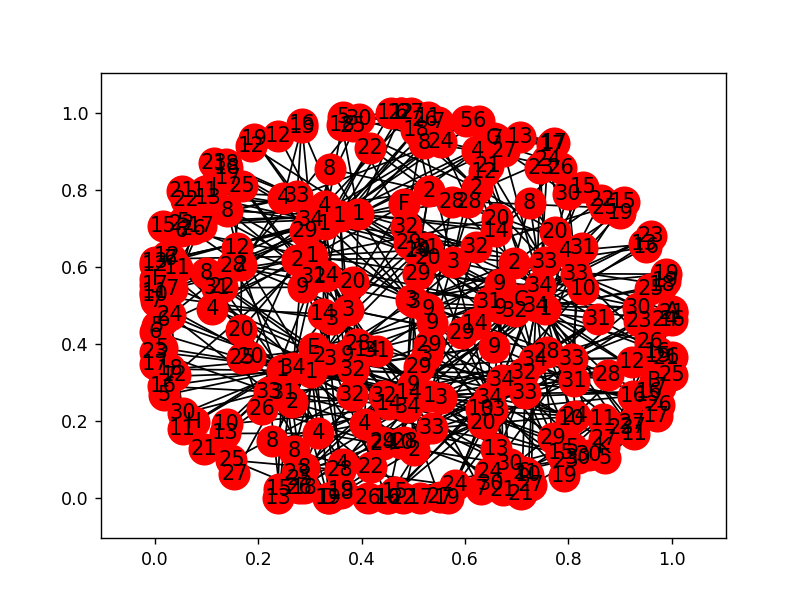

C:\Users\Keulando\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
C:\Users\Keulando\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
C:\Users\Keulando\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):


In [4]:
nx.draw_networkx(G)

## Global Clustering Coeff

In [5]:
# approach 1: avg local clustering coef over all nodes

nx.average_clustering(G)

0.2818181818181818

**Approach 2**:
- % of open triads that are trinagles in a network

- ( 3 nodes connected by only 2 edges, instead of 3 for a triangle)

- therell be always 3 open triads for each open triangle 

- Transitivity = 3* # closed triads/ # open triads

- Trans weights nodes with large degree higher

In [6]:
nx.transitivity(G)

0.3333333333333333

# Distance Measures

- Path: A sequence of nodes connected by an edge
- distance: length of shortest path between them

In [9]:
nx.shortest_path(G,"A","H")

['A', 'C', 'E', 'H']

In [10]:
nx.shortest_path_length(G,"A","H")

3

- Find distance from node A to every other node:
- Breadth-first-search: dist from a node to all nodes by discoevering nodes in layers

In [11]:
T = nx.bfs_tree(G,"A")
T.edges()

[('A', 'K'),
 ('A', 'B'),
 ('A', 'C'),
 ('C', 'E'),
 ('C', 'F'),
 ('E', 'D'),
 ('E', 'H'),
 ('E', 'I'),
 ('F', 'G'),
 ('I', 'J')]

In [12]:
nx.shortest_path_length(G,"A")

{'A': 0,
 'B': 1,
 'C': 1,
 'D': 3,
 'E': 2,
 'F': 2,
 'G': 3,
 'H': 3,
 'I': 3,
 'J': 4,
 'K': 1}

## average dist 

In [13]:
nx.average_shortest_path_length(G)

2.381818181818182

## Max distance

In [14]:
nx.diameter(G)

5

## Eccentricity
of node n is the largest distance betwwen n and all other nodes

In [15]:
nx.eccentricity(G)
# take node E, no node in this graph is at distance larger than three 
# from node E

{'A': 4,
 'B': 4,
 'C': 3,
 'D': 4,
 'E': 3,
 'F': 3,
 'G': 4,
 'H': 4,
 'I': 4,
 'J': 5,
 'K': 5}

In [16]:
# radius is the minimum eccentricity
nx.radius(G)

3

## Periphery

set of nodes in G that have an eccentricity equal to the diameter --> nodes that are furthest away

In [17]:
nx.periphery(G)

['K', 'J']

## Center
set of nodes that have eccentricity equal to the radius --> nodes closest to the center

In [18]:
nx.center(G)

['C', 'E', 'F']

In [28]:
# example
G = nx.karate_club_graph()
G=nx.convert_node_labels_to_integers(G, first_label=1)


nx.draw_networkx(G)

C:\Users\Keulando\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
C:\Users\Keulando\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
C:\Users\Keulando\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):


In [23]:
nx.__version__

'1.11'

In [29]:
nx.radius(G)

3

In [30]:
nx.average_shortest_path_length(G)

2.408199643493761

In [31]:
nx.diameter(G)

5

In [32]:
nx.center(G)

[1, 2, 3, 4, 9, 14, 20, 32]

In [33]:
nx.periphery(G)

[17, 15, 16, 19, 21, 23, 24, 30, 27]

# Connected components

an undirected graph is connected if, for every pair nodes there is a path between them

conditions:
- every node in the subset has a path to every other node
- no other nodes has a path to and from every node in the subset

In [38]:
G = nx.Graph()
G.add_edges_from([("A","K"),("A","B"),("A","C"),("B","C"),("B","K"),("C","E"),("C","F"),("D","E"),("E","F"),("E","H"),("F","G"),("I","J"),("I","E")])

In [39]:
nx.is_connected(G)

True

In [40]:
nx.number_connected_components(G)

1

In [41]:
sorted(nx.connected_components(G))

[{'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K'}]

In [42]:
nx.node_connected_component(G,"J")

{'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K'}

## Directed graphs

a directed graph is **strongly** connected if for every pair of nodes u and v there is a directed path from u to v and a directed path from v to u

a directed graph is **weakly** connected if replacing all directed edges with undirected edges produces a connected unidrected graph

Strongly connected component:

A subset of nodes such as:

conditions:
- every node in the subset has a **directed** path to every other node
- no other nodes has a **directed** path to and frome every node in the subset

# Network Robustness

the ability of a network to maintain its general structural properties when it faces failures or attacks

or 

ability to maintain its connectivity even after 'attacks' (like removal of node)

- Robust networks have large minimum node and edge cuts

## Disconnecting a graph

?# of nodes that can be removed from G in order to discconnec it?

? smallest # of edges that can be removed from this graph in order to disconnect it?

## Simple Paths

Immage node G wants to send a message to node H by passing it along to other odes in this nx, what are the options?

In [45]:
sorted(nx.all_simple_paths(G,"G","H"))

[['G', 'F', 'C', 'E', 'H'], ['G', 'F', 'E', 'H']]

If we wanted to block the message from G to H by removing **nodes** from nx how many nodes would we need to remove?

In [46]:
nx.node_connectivity(G,"G","H")

1

In [47]:
nx.minimum_node_cut(G,"G","H")

{'E'}

If we wanted to block the message from G to H by removing **edges** from nx how many nodes would we need to remove?

In [48]:
nx.edge_connectivity(G,"G","H")

1

In [49]:
nx.minimum_edge_cut(G,"G","H")

{('E', 'H')}

# Visualizing Networks

In [52]:
%matplotlib inline

import networkx as nx
import matplotlib.pyplot as plt

# read in the graph 
G = nx.read_gpickle('major_us_cities')

C:\Users\Keulando\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
C:\Users\Keulando\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
C:\Users\Keulando\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):


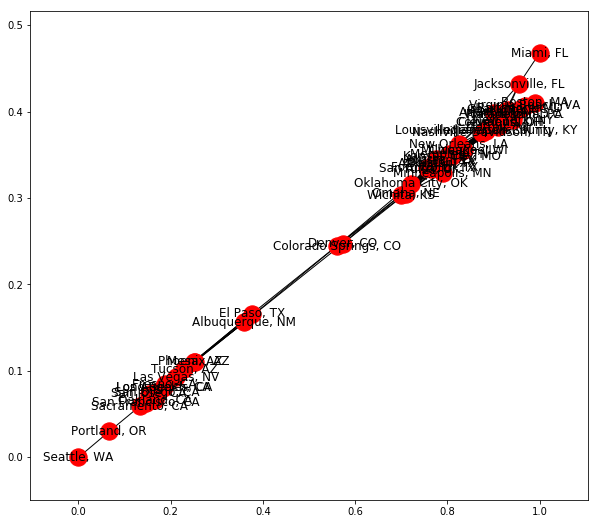

In [55]:
# draw the graph using the default spring layout
plt.figure(figsize=(10,9))
nx.draw_networkx(G)

In [56]:
# See what layouts are available in networkX
[x for x in nx.__dir__() if x.endswith('_layout')]

['circular_layout',
 'random_layout',
 'shell_layout',
 'spring_layout',
 'spectral_layout',
 'fruchterman_reingold_layout']

C:\Users\Keulando\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
C:\Users\Keulando\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
C:\Users\Keulando\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):


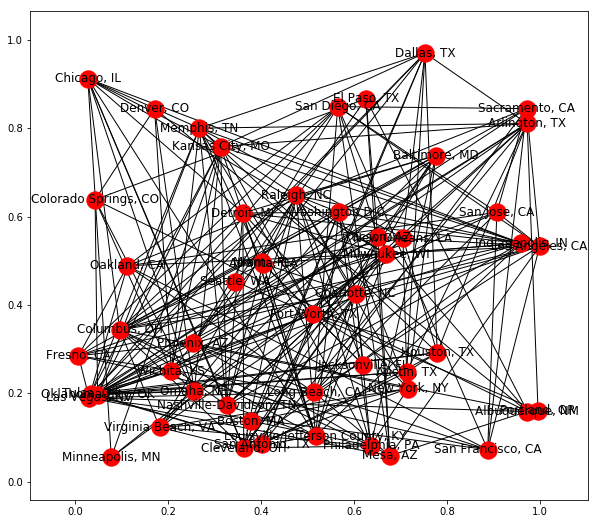

In [57]:
# Draw the graph using the random layout
plt.figure(figsize=(10,9))
pos = nx.random_layout(G)
nx.draw_networkx(G, pos)

C:\Users\Keulando\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
C:\Users\Keulando\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
C:\Users\Keulando\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):


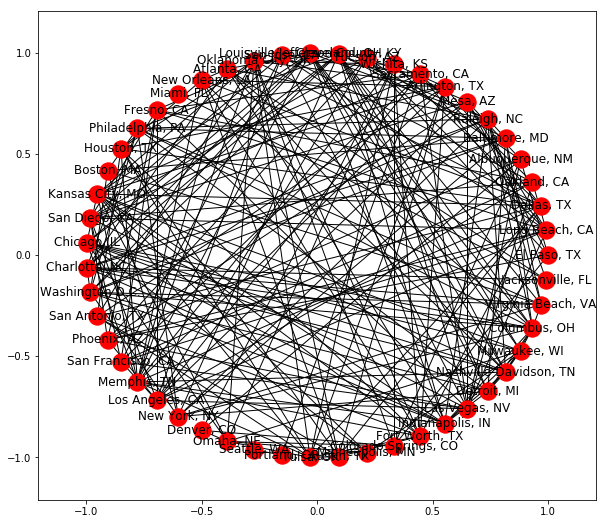

In [58]:
# circular layout
plt.figure(figsize=(10,9))
pos = nx.circular_layout(G)
nx.draw_networkx(G, pos)

C:\Users\Keulando\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
C:\Users\Keulando\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
C:\Users\Keulando\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):


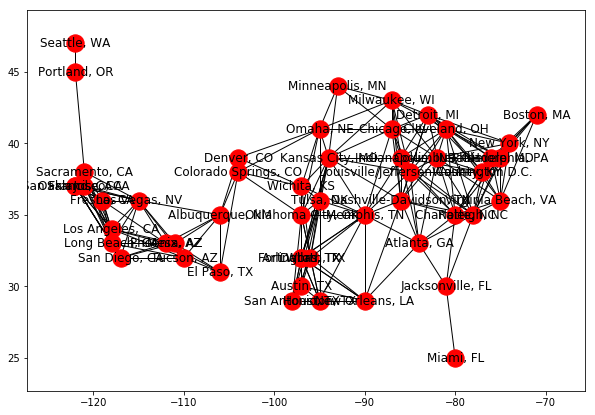

In [59]:
# Draw the graph using custom node positions
plt.figure(figsize=(10,7))

pos = nx.get_node_attributes(G, 'location')
nx.draw_networkx(G, pos)

C:\Users\Keulando\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
C:\Users\Keulando\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:


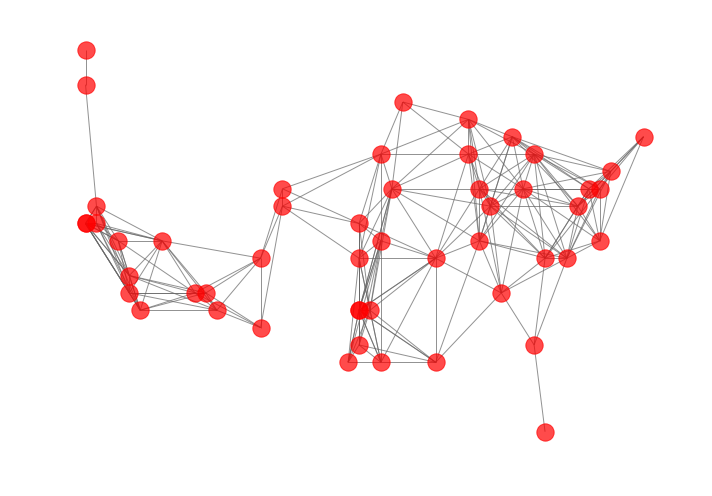

In [60]:
# Draw the graph adding alpha, removing labels, and softening edge color
plt.figure(figsize=(10,7))

nx.draw_networkx(G, pos, alpha=0.7, with_labels=False, edge_color='.4')

plt.axis('off')
plt.tight_layout();

C:\Users\Keulando\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
C:\Users\Keulando\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:


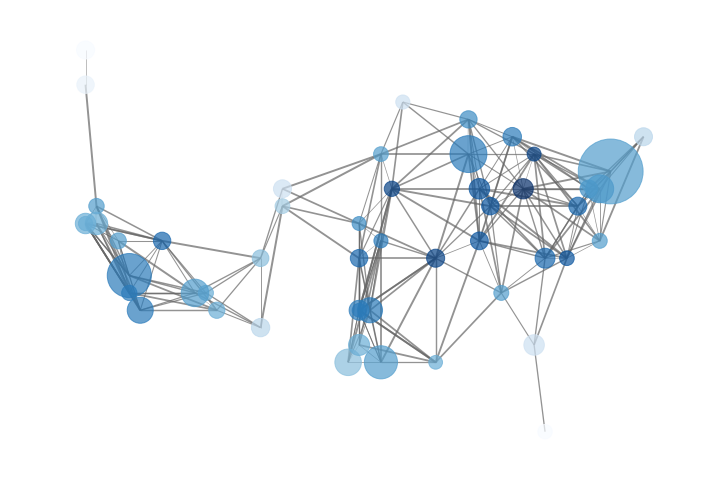

In [61]:
# Draw graph with varying node color, node size, and edge width
plt.figure(figsize=(10,7))

node_color = [G.degree(v) for v in G]
node_size = [0.0005*nx.get_node_attributes(G, 'population')[v] for v in G]
edge_width = [0.0025*G[u][v]['weight'] for u,v in G.edges()]

nx.draw_networkx(G, pos, node_size=node_size, 
                 node_color=node_color, alpha=0.7, with_labels=False, 
                 width=edge_width, edge_color='.4', cmap=plt.cm.Blues)

plt.axis('off')
plt.tight_layout();

C:\Users\Keulando\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
C:\Users\Keulando\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
C:\Users\Keulando\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):


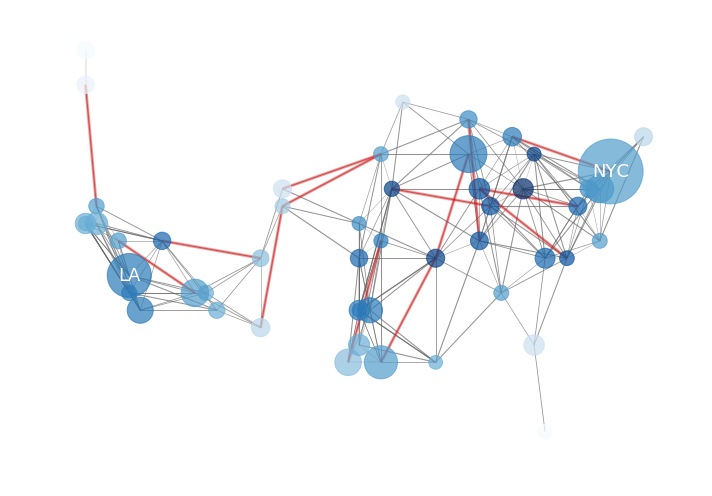

In [62]:
# Draw specific edges and add labels to specific nodes
plt.figure(figsize=(10,7))

node_color = [G.degree(v) for v in G]
node_size = [0.0005*nx.get_node_attributes(G, 'population')[v] for v in G]
edge_width = [0.0015*G[u][v]['weight'] for u,v in G.edges()]

nx.draw_networkx(G, pos, node_size=node_size, 
                 node_color=node_color, alpha=0.7, with_labels=False, 
                 width=edge_width, edge_color='.4', cmap=plt.cm.Blues)


greater_than_770 = [x for x in G.edges(data=True) if x[2]['weight']>770]
nx.draw_networkx_edges(G, pos, edgelist=greater_than_770, edge_color='r', alpha=0.4, width=3)

nx.draw_networkx_labels(G, pos, labels={'Los Angeles, CA': 'LA', 'New York, NY': 'NYC'}, font_size=18, font_color='w')

plt.axis('off')
plt.tight_layout();

**Week 3**

# Influence Measures and Network Centralization

Different ways to measure importance:
- High degree of connections to other nodes
- higher Average proximity to other nodes
- Important nodes are those who tend to connect to other nodes in the nx --> the fraction of shortest paths that pass through a particular node


Centrality measures identify the most important nodes in a network:
- influential nodes in nx
- nodes that disseminate info to many nodes or preven epidemics
- hubs in transportation network
- important pages on the web
- nodes that prevent the nx from breaking up

commonly used Centrality Measures:
- **Degree centrality**
- **Closeness centrality**
- betweeness centrality
- page rank
- Katz centrality
- percolation centrality

## Degree Centrality

assumption: important nodes have many connections 

basic measure --> number of neighbours


**Undirected Nx: use degree**

C(v) = dv/N-1   [goes from 0 to 1]

dv: degree of node v,
N: set of nodes

**Directed Nx: use in-degree or out-degree**

Cin(v) = dv_in/N-1

Cout(v) = dv_out/N-1

dv_in: in-degree of node v

 **PY code:**

In [63]:
#uNdirected
import networkx as nx
G=nx.karate_club_graph()
G= nx.convert_node_labels_to_integers(G,first_label=1)
degCent = nx.degree_centrality(G)
degCent[34]

0.5151515151515151

## Closeness centrality

assumption: important nodes are close to other ndoes

Cclose(v) = N-1/ sum( d(u,v) )

[sum over all the other nodes in nx and tdistance between node v and those nodes]

In [64]:
closeCent = nx.closeness_centrality(G)
closeCent[32]

0.5409836065573771

In [65]:
#denominator:
sum(nx.shortest_path_length(G,32).values())

61

In [66]:
#nominator
len(G.nodes())-1

33

What about disconnected nodes??

- consider only nodes that L can reach, not so good

- consider only nodes that L can reach and **normalize by the fraction of nodes L can reach**

In [68]:
closeCent = nx.closeness_centrality(G, normalized=True)

## Betweenness

assumption: important nodes connect other nodes

?What are the nodes that show up in the shortest path between 2 different nodes?

method for node V: Take nodes S T and find all the shortedst between nodes S and T (Sigma s,t ) -> number of shortest paths. Then look at how many of those shortest paths contains node V

Normalization: values will be larer in graphs with manz nodes. to ontrol fo this we divide centrality values by the number of pairs of nodes in graph( ecxluding v) 

0.5*(N-1)(N-2) for **undirected**
    
   (N-1)(N-2) for **directed**
    

In [69]:
btwnCent = nx.betweenness_centrality(G, normalized=True, endpoints=False)

import operator
sorted(btwnCent.items(), key=operator.itemgetter(1), reverse=True)[0:5]


[(1, 0.4376352813852815),
 (34, 0.30407497594997596),
 (33, 0.14524711399711404),
 (3, 0.14365680615680615),
 (32, 0.13827561327561327)]

Computation time is expensive for btwn centrality, it takes up to N^3

we can do an aproximation of centrlaity using only a random subset of nodes

or we can use a specified subset of Source and Target nodes to compute it, using nx.betweenness_centrality_subset()

In [70]:
btwnCent_aprox = nx.betweenness_centrality(G, normalized=True, endpoints=False, k=10)
sorted(btwnCent.items(), key=operator.itemgetter(1), reverse=True)[0:5]

[(1, 0.4376352813852815),
 (34, 0.30407497594997596),
 (33, 0.14524711399711404),
 (3, 0.14365680615680615),
 (32, 0.13827561327561327)]

for Edges it is quite the same

In [71]:
btwnCent_edges = nx.edge_betweenness_centrality(G, normalized=True)
sorted(btwnCent_edges.items(), key=operator.itemgetter(1), reverse=True)[0:5]

[((1, 32), 0.12725999490705373),
 ((1, 7), 0.07813428401663695),
 ((1, 6), 0.07813428401663694),
 ((1, 3), 0.07778768072885717),
 ((1, 9), 0.07423959482783016)]

## Basic Page Rank

Assigns a score of importance to each node, important nodes are those with many in-links from important pages.

Mostly used for directed nx

n: # nodess in Nx
k: # of steps

1) assign all nodes PR of 1/n
2) Perform basic PR update rule k times ( each node gives an equal share of its current PR to all the nodes it links to )
3) new PR of each node is sum of all the pR it received from other nodes

PR values will mostly converge as k gets larger

### Interpreting PR

The pR of a node at step k is the probability that a random walker lands on the node adter taking k steps

## Hubs and Authorities

Given a query to a search engine:

- Root: set of highly relevant web pages (pages that contain the query string) - potential *authorities*
- find all pages that link to a page in root - potential *hubs*
- Base: root nodes and nay node that links to a node in root
- consider all edges connecting nodes in the base set

Difference from PR i: here we start with a small subset of  the Nx: look fro pages that are relevant and those that connect to it

next step: run HITS algo

- computing k iteration of the HITS algo to assign an authoity score and hub score to each node

1) assign each node an authority and hub score of 1

2) apply the Authority Update Rule: each nodes auth score is the sum of hub scores of each node that **points to it**

3) apply Hub Update Rule: each nodes hub score is the sum of auth scores of each node that **it points to**

4) Normalize auth and hubs scores

** PY code:**
nx.hits(G)

**Week 4**

# Applications

## Preferential Attachment Model

 We're interested in seeing how the degrees of all the nodes are distributed across the whole network.

Degree distribution of a grpah is the probability distr of the degrees over the entire network

**??** what could explain this property that we observe happening in many different networks **??**

To answer this we come up with models that generate networks that make a few assumptions about how these networks get formed and then they give rise to whatever property we observe. 

One of the models is the preferential Attachment model ( especially good to form power-law likes networks

how it works:
- start with 2 nodes connected by an edge
- at each time step add a new node with an edge connecting it to an existing node
- choose the node to connect to at random with proability proportional to each node's degree.
- the prob of connecting to node u of deg ku is ku/sum(deg of all nodes)

There is this sort of rich get richer phenomenon, where as the nodes get larger and larger degree, they also start to become more and more likely to increase their degree. --> it gives rise to a power law

in nx:

G = nx.barabasi_albert_graph(n,m)

then you can plot the deg distr with the abve code

## Small world Networks

- assumption: we are all connected by wery shrt path between each other
- discovery:   Networks tend to have high clustering coeff nd small avg path length
- replicate:  what network generative model has these properties?


How about Preferential Attach. model?

it has small avg path length but fails to have high cluster coeff because there is no mechanism ( in this model) that would favor trhiangle formation

In [72]:
G = nx.barabasi_albert_graph(1000,4) #1000 nodes and each node is gonna attach to 4 other nodes
print(nx.average_clustering(G)),
print(nx.average_shortest_path_length(G))

0.034231632578220886
3.1814594594594596


model that achieves this is the "Small-World Network" such surprise:

- start with a ring of n nodes, where each node is connedcted to is k nearest neighbours
- fix parameter p (0,1)
- consider each edge(u,v). with proba p, select a node w at random and rewire the edge (u,v) so it becomes (u,w)

when p=0 no edge is rewired: Cluster coef is really high but avg_path is extremly high

when p=1: all edges rewired ( completly random): lower cluster coef and lower avg_path

### Variants

pitfalls:
- network could get disconnected

use: nx.connected_watts_strogatz_graph(n,k,p,t) -> run watts_str.. up to t times, until it returns a connected small world network

newman_watts_strogatz_graph(n,k,p) 
model similar to small worlds but rather than rewiring edges,** new edges are added with proba p**

## Link Predictions

GIven a pair of nodes, how to assess whether they are liekly to connect??


### Measure I: Common Neighbours

#num of common Neighbours of nodes X and Y

What if 2 possible edges have the same num of neighbors?

### Meaure II: Jaccard Coefficient

Number of common neighbors but normalized by total num of neighbors

### Measure III: Resource Allocation

Fraction of a resource that a node can send to another through their common neighbors

sum of 1 over the common neighbors degree  1/3 +1/5 +1/2

### Measure IV: Adamic-Adar Index

similar to res_alloc but wih log in the denominator

### Measure V: Preferntial Attachment score

similar to Mes I but nodes with high degree get more neighbors

pre_attach(x,y) =|N(x)|* |N(y)| ((neigbors of x times neig of y))

### Community Structure

these type of  models considers the community structure of the network for link prediction. ex: set of nodes coming from the same counrty, nodes who speak the same language or businees structure like hr, upper management, IT, legal

Assumption: pairs of nodes who belong to the same community adn have many common neighbors in their community are likely to form an edge

#### Measure VI: Community Common Neighbors

number of common neighbors with bonus for neighbors in same community

#### Measure VII: Community Resource Allocation

similar to res_alloc but only considering nodes in the same community

- 0 if one of the nodes belongs to another community
- sum of 1/deg of common neighbors otherwise

# Extracting features from graphs


In [74]:
G = nx.read_gpickle('major_us_cities') 

## Node Based Features


In [76]:
G.nodes(data=True)

#init df, using nodes as index
df = pd.DataFrame(index=G.nodes())

**Extract attributes**


In [77]:
# use nx.get_node_attributes to easyli extract the attributes from graph to df columns

df['location']=pd.Series(nx.get_node_attributes(G, 'location'))
df['population']=pd.Series(nx.get_node_attributes(G, 'population'))

df.head()

,location,population
"El Paso, TX","(-106, 31)",674433
"Long Beach, CA","(-118, 33)",469428
"Dallas, TX","(-96, 32)",1257676
"Oakland, CA","(-122, 37)",406253
"Albuquerque, NM","(-106, 35)",556495


**Create node based features**

In [78]:
df['clustering']=pd.Series(nx.clustering(G))
df['degree']=pd.Series(G.degree())
df.head()

,location,population,clustering,degree
"El Paso, TX","(-106, 31)",674433,0.700000,5
"Long Beach, CA","(-118, 33)",469428,0.745455,11
"Dallas, TX","(-96, 32)",1257676,0.763636,11
"Oakland, CA","(-122, 37)",406253,1.000000,8
"Albuquerque, NM","(-106, 35)",556495,0.523810,7


## Edge based features

In [79]:
G.edges(data=True)

#init df using edges as index
df=pd.DataFrame(index=G.edges())

** extract attributes**

In [80]:
df['weight']=pd.Series(nx.get_edge_attributes(G, 'weight'))
df.head()

,weight
"(El Paso, TX, Albuquerque, NM)",367.885844
"(El Paso, TX, Mesa, AZ)",536.256660
"(El Paso, TX, Tucson, AZ)",425.413867
"(El Paso, TX, Phoenix, AZ)",558.783570
"(El Paso, TX, Colorado Springs, CO)",797.751712


**create edge based features**


Many of the networkx functions related to edges return a nested data structures. We can extract the relevant data using list comprehension.

In [81]:
df['preferential attachment']=[i[2] for i in nx.preferential_attachment(G, df.index)]
df.head()

,weight,preferential attachment
"(El Paso, TX, Albuquerque, NM)",367.885844,35
"(El Paso, TX, Mesa, AZ)",536.256660,40
"(El Paso, TX, Tucson, AZ)",425.413867,40
"(El Paso, TX, Phoenix, AZ)",558.783570,45
"(El Paso, TX, Colorado Springs, CO)",797.751712,30


In [82]:
df['common_neighbors']=df.index.map(lambda city: len(list(nx.common_neighbors(G, city[0],city[1]))))
df.head()

,weight,preferential attachment,common_neighbors
"(El Paso, TX, Albuquerque, NM)",367.885844,35,4
"(El Paso, TX, Mesa, AZ)",536.256660,40,3
"(El Paso, TX, Tucson, AZ)",425.413867,40,3
"(El Paso, TX, Phoenix, AZ)",558.783570,45,3
"(El Paso, TX, Colorado Springs, CO)",797.751712,30,1


# Functions written for the tests

In [ ]:
def degree_distribution(G, only_len=True):
    deg=G.degree()
    deg_values=sorted(set(deg.values()))
    histogram=[list(deg.values()).count(i)/float(nx.number_of_nodes(G)) for i in deg_values]
    if only_len:
        return len(histogram)
    else:
        return histogram

In [ ]:
def graph_identification():
    
    graph_dict={}
    for i in range(len(P1_Graphs)):
        graph_dict['Graph_'+str(i+1)]={'avg_clustering':nx.average_clustering(P1_Graphs[i]),
                                      'avg_path':nx.average_shortest_path_length(P1_Graphs[i])}
    df=pd.DataFrame().from_dict(graph_dict, orient='index')
    df['nodes_dist']=[degree_distribution(g) for g in P1_Graphs ]
    ans=[]
    for i in range(len(df)):
        if df['nodes_dist'][i]>10:
            ans.append('PA')
        elif df['avg_clustering'][i]> 0.1:
            ans.append('SW_L')
        else:
            ans.append('SW_H')
    
    return ans

In [ ]:
print(f'Connected? {nx.is_connected(G)}\n# of components? {nx.number_connected_components(G)}')

In [ ]:
from sklearn.ensemble import AdaBoostClassifier as ADA

def salary_predictions():
    
    df=pd.DataFrame(index=G.nodes())
    df['salary']=pd.Series(nx.get_node_attributes(G,'ManagementSalary'))
    df['department']=pd.Series(nx.get_node_attributes(G, 'Department'))
    df['clustering']=pd.Series(nx.clustering(G))
    df['degree'] = pd.Series(G.degree())
    df['degree centrality'] = pd.Series(nx.degree_centrality(G))
    df['closeness centrality']=pd.Series(nx.closeness_centrality(G, normalized=True))
    df['betweeness centrality']=[i for i in (nx.betweenness_centrality(G, normalized=True, endpoints=False)).values()]
    df['PR']=[ i for i in nx.pagerank(G).values()]

    features = list(df.columns[1:].values)

    df_c=df.copy()
    df_c.dropna(axis=0, inplace=True)
    X_train = df_c[features]
    y_train = df_c['salary']

    #this is for y_test
    df_nan = df[df.isnull().any(axis=1)]
    X_test = df_nan[features]
    y_test = df_nan['salary']
    
    clf=ADA().fit(X_train,y_train)
    precit_y = clf.predict_proba(X_test)[:,1]
    
    return pd.Series(precit_y, X_test.index)

In [ ]:
def new_connections_predictions():
    for node in G.nodes():
        G.node[node]['community']=G.node[node]['Department']

    df=future_connections.copy()
    df['preferential_attch'] = [i[2] for i in nx.preferential_attachment(G, df.index)]
    df['common neighbors'] = df.index.map(lambda edge: len(list(nx.common_neighbors(G,edge[0],edge[1]))))
    df['jaccard coef']=[i[2] for i in nx.jaccard_coefficient(G, df.index)]
    df['res_alloc_index']=[i[2] for i in nx.resource_allocation_index(G, df.index)]
    df['AA-index']=[i[2] for i in nx.adamic_adar_index(G, df.index)]
    df['community neighbors']=[i[2] for i in nx.cn_soundarajan_hopcroft(G, df.index)]
    df['communuity res_alloc']=[ i[2] for i in nx.ra_index_soundarajan_hopcroft(G, df.index)]

    features = list(df.columns[1:].values)

    df_c=df.copy()
    df_c.dropna(axis=0, inplace=True)
    X_train = df_c[features]
    y_train = df_c['Future Connection']

    df_nan=df[df.isnull().any(axis=1)]
    X_test=df_nan[features]

    clf2=ADA().fit(X_train, y_train)
    predict_y2 = clf2.predict_proba(X_test)[:,1]
    results= pd.Series(predict_y2, X_test.index)

    return results